In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Loads the data into a dataframe
df = pd.read_csv('./data/Jan_2019_ontime.csv')
df2 = pd.read_csv('./data/Jan_2020_ontime.csv')
df.append(df2)
df.shape

(583985, 22)

In [3]:
# baseline
df.ARR_DEL15.value_counts()
base_acc = 460741 / (460741 + 105222)
print('baseline acc', base_acc)

baseline acc 0.8140832527921437


In [4]:
# Drops column with no data and reduces the data to just a small sample for establishing a baseline
df = df.sample(frac=0.05)
df = df.drop(['Unnamed: 21', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'OP_CARRIER_AIRLINE_ID',
             'DEP_TIME_BLK', 'DEP_DEL15', 'ARR_TIME', 'CANCELLED', 'DIVERTED'], axis=1)
df = df.dropna()
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_DEL15,DISTANCE
158559,9,3,DL,N808DN,953,PBI,ATL,641.0,0.0,545.0
103030,6,7,MQ,N834AE,3634,ORF,LGA,624.0,0.0,296.0
123179,7,1,OO,N902EV,3118,MKE,ORD,1007.0,0.0,67.0
368084,20,7,DL,N911DE,2021,DAY,ATL,1509.0,1.0,432.0
552005,30,3,WN,N8561Z,1212,IND,ATL,1701.0,0.0,432.0


In [5]:
# Splits data into test and training sets
X = df.drop('ARR_DEL15', axis=1)
y = df.ARR_DEL15
X.OP_CARRIER_FL_NUM = X.OP_CARRIER_FL_NUM.astype('category')
X.DAY_OF_WEEK = X.DAY_OF_WEEK.astype('category')
X.OP_CARRIER_FL_NUM = X.OP_CARRIER_FL_NUM.astype('category')
X.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DISTANCE
158559,9,3,DL,N808DN,953,PBI,ATL,641.0,545.0
103030,6,7,MQ,N834AE,3634,ORF,LGA,624.0,296.0
123179,7,1,OO,N902EV,3118,MKE,ORD,1007.0,67.0
368084,20,7,DL,N911DE,2021,DAY,ATL,1509.0,432.0
552005,30,3,WN,N8561Z,1212,IND,ATL,1701.0,432.0


In [6]:
# One-hot-encodes categorical features and standardizes numerical features
X_num = X[['DEP_TIME', 'DISTANCE']]
# X_num = (X_num - X_num.mean())/X_num.std()
X_cat = X.drop(['DEP_TIME', 'DISTANCE'], axis=1)
X_cat = pd.get_dummies(X_cat)
X = X_num.join(X_cat)
X.head()

,DEP_TIME,DISTANCE,DAY_OF_MONTH,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,...,DEST_TYR,DEST_TYS,DEST_UIN,DEST_USA,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,DEST_YUM
158559,641.0,545.0,9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103030,624.0,296.0,6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
123179,1007.0,67.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368084,1509.0,432.0,20,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
552005,1701.0,432.0,30,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# PCA
n_comp = 2
pca = PCA(n_components=n_comp)
pca.fit(X_train)
Z = pca.transform(X_train)
Z_test = pca.transform(X_test)
Z.shape
Z_test.shape

(5655, 2)

In [9]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(Z, y_train)

KNeighborsClassifier(n_jobs=-1)

In [10]:
knn.score(Z, y_train)

0.8372905336693638

In [11]:
knn.score(Z_test, y_test)

0.7819628647214855

In [12]:
# %load "C:/Users/Zijian Huang/MA415/biplot.py"
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE


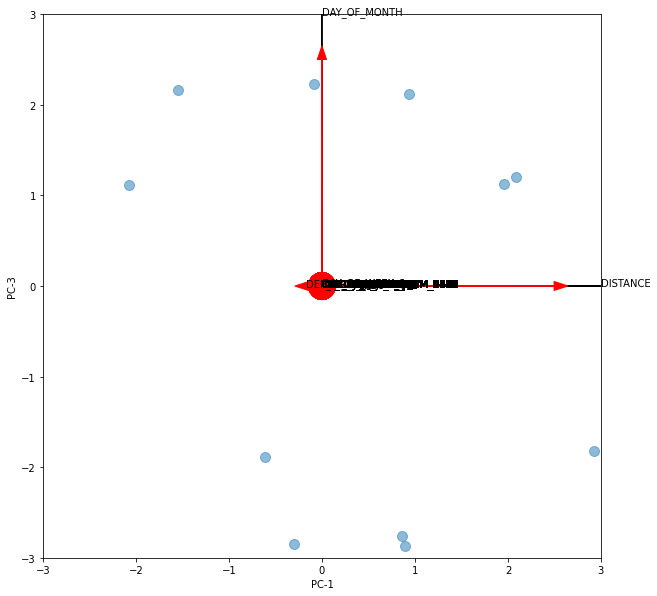

In [13]:
PVE = biplot(X, 20, 1, 3, scale = 2.5, alpha = 0.5, s = 100)

<AxesSubplot:>

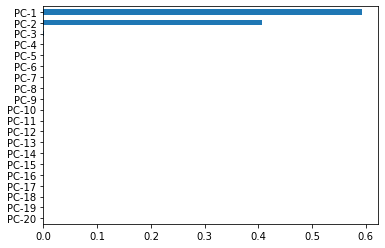

In [14]:
PVE.sort_values().plot.barh()

In [15]:
PVE

PC-1     5.934815e-01
PC-2     4.063764e-01
PC-3     1.327390e-04
PC-4     3.012761e-07
PC-5     2.779988e-07
PC-6     2.661915e-07
PC-7     2.509670e-07
PC-8     2.430005e-07
PC-9     2.257602e-07
PC-10    2.142431e-07
PC-11    2.032865e-07
PC-12    1.804798e-07
PC-13    1.577629e-07
PC-14    1.158098e-07
PC-15    9.349252e-08
PC-16    9.139180e-08
PC-17    8.087141e-08
PC-18    7.605233e-08
PC-19    7.527414e-08
PC-20    7.029576e-08
dtype: float64

In [104]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_DEL15,DISTANCE
262690,14,1,UA,N38727,1573,IAH,LGA,822,0.0,1416.0
11815,1,2,UA,N466UA,2255,TPA,IAH,1341,0.0,787.0
443741,24,4,WN,N717SA,402,MCO,PVD,1357,1.0,1072.0
497117,27,7,DL,N330NW,2321,PBI,LGA,1632,1.0,1035.0
356514,19,6,AS,N586AS,580,PDX,SNA,1223,0.0,859.0
...,...,...,...,...,...,...,...,...,...,...
541009,29,2,EV,N22909,4408,SAV,EWR,1849,0.0,708.0
362088,20,7,AS,N597AS,823,SEA,SMF,621,0.0,605.0
528844,29,2,AA,N913US,660,PHL,PHX,1517,0.0,2075.0
294430,16,3,DL,N971DL,1786,ICT,ATL,547,0.0,782.0


In [262]:
df = pd.read_csv('./data/Jan_2019_ontime.csv')
df2 = pd.read_csv('./data/Jan_2020_ontime.csv')
df.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object

In [263]:
df = df.sample(frac=0.05, random_state = 0)
df = df.drop(['Unnamed: 21', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'OP_CARRIER_AIRLINE_ID',
             'DEP_TIME_BLK', 'DEP_DEL15', 'ARR_TIME', 'CANCELLED', 'DIVERTED'], axis=1)
df = df.dropna()
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,ARR_DEL15,DISTANCE
183878,10,4,DL,N954AT,2428,ATL,CLT,1257.0,0.0,226.0
446957,24,4,NK,N601NK,280,TPA,PIT,1638.0,0.0,873.0
52391,3,4,WN,N264LV,1859,LAS,DEN,1852.0,0.0,628.0
380221,21,1,MQ,N809AE,3504,DFW,AEX,1502.0,0.0,285.0
525412,28,1,UA,N68836,619,IAH,SEA,1819.0,0.0,1874.0


In [264]:
df.shape

(28301, 10)

In [265]:
df['DEP_TIME'] = df['DEP_TIME'].astype(int)
df['DEP_TIME'] = df['DEP_TIME'].astype(str)
df['DEP_TIME']

183878    1257
446957    1638
52391     1852
380221    1502
525412    1819
          ... 
483419     723
307299    1552
350086    1501
96014     1213
173241    1929
Name: DEP_TIME, Length: 28301, dtype: object

In [266]:
def convertTime(x):
    if x == None:
        return
    if len(str(x)) == 3:
        return x[:1] + ':' + x[1:]
    
    if len(str(x)) == 4: 
        return x[:2] + ':' + x[2:]
    

In [267]:
# df = df.dropna()

In [268]:
def convertTwentyfourToZero(x):
    if x == None:
        return
    if x.split(':')[0] == '24':
        return '0' + x.split(':')[1]
    return x

In [269]:
df['DEP_TIME'] = df['DEP_TIME'].apply(lambda x: convertTime(x))
df['DEP_TIME']
df['DEP_TIME'] = df['DEP_TIME'].apply(lambda x: convertTwentyfourToZero(x))
df['DEP_TIME']

183878    12:57
446957    16:38
52391     18:52
380221    15:02
525412    18:19
          ...  
483419     7:23
307299    15:52
350086    15:01
96014     12:13
173241    19:29
Name: DEP_TIME, Length: 28301, dtype: object

In [270]:
df['time'] = '2019-01-' + df['DAY_OF_MONTH'].astype(str) + '-' + df['DEP_TIME'].astype(str)

In [271]:
df['time']

183878    2019-01-10-12:57
446957    2019-01-24-16:38
52391      2019-01-3-18:52
380221    2019-01-21-15:02
525412    2019-01-28-18:19
                ...       
483419     2019-01-26-7:23
307299    2019-01-17-15:52
350086    2019-01-19-15:01
96014      2019-01-6-12:13
173241    2019-01-10-19:29
Name: time, Length: 28301, dtype: object

In [272]:
df = df.dropna()

In [ ]:
df['ts'] = pd.to_datetime(df.time)

In [ ]:
df